In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
lr = 0.0001
data = pd.read_csv("D:\CODE\jupyter notebook\data\(日月光华)PyTorch深度学习教程课件\(日月光华)PyTorch深度学习教程课件\income.csv")
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)

In [6]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(w, x) + b
        loss = (y - y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= w.grad.data * lr
            b.data -= b.grad.data * lr
print("w: ", w)
print("b: ", b)

w:  tensor([4.9747], requires_grad=True)
b:  tensor([-28.3715], requires_grad=True)


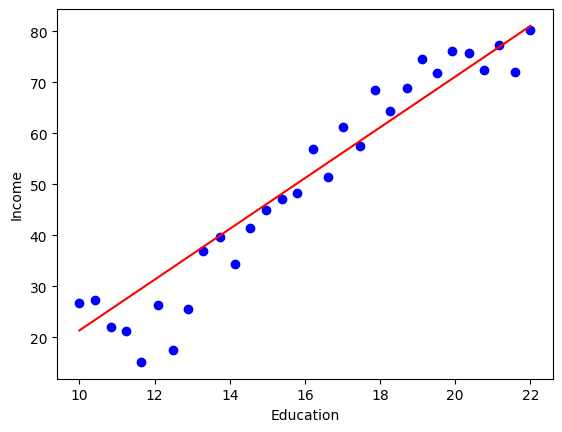

In [12]:
plt.xlabel("Education")
plt.ylabel("Income")
plt.plot(X, (X*w+b).data, color="red")
plt.scatter(X, Y, color="blue")